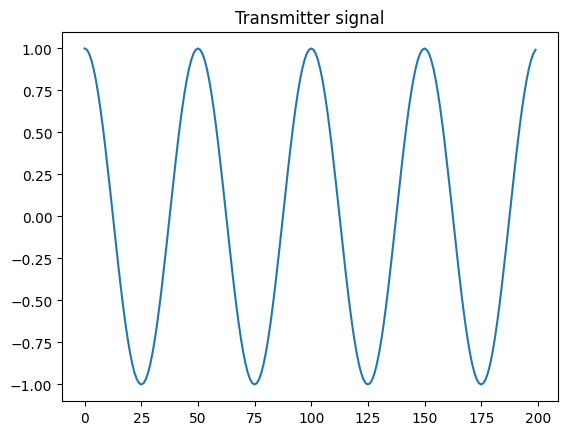

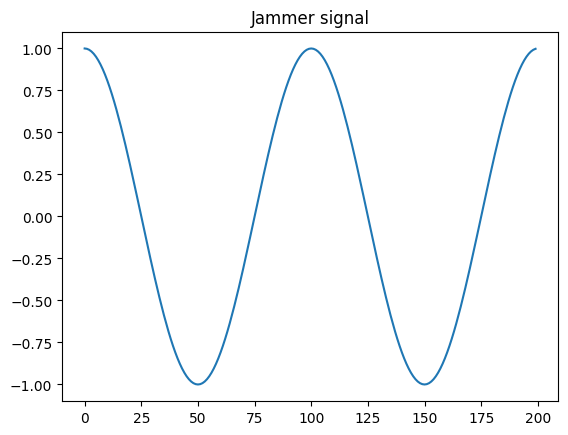

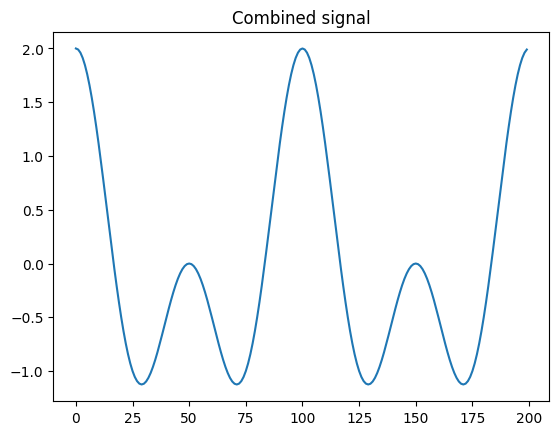

[1.+0.j 1.+0.j 1.+0.j 1.+0.j]
(4, 10000)


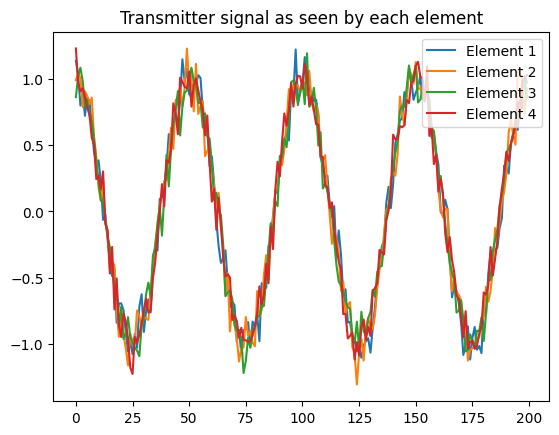

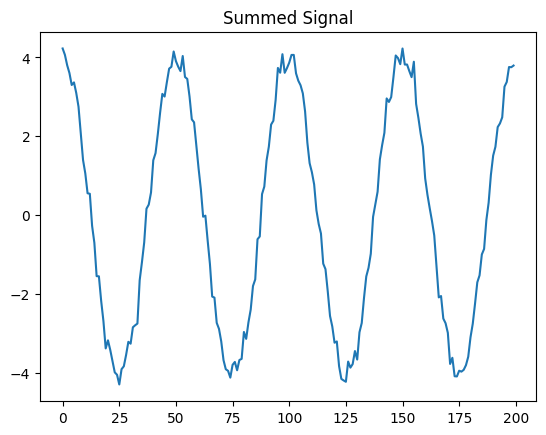

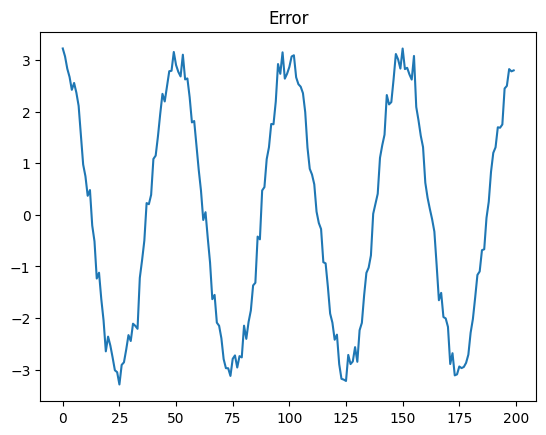

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import time

sample_rate = 1e6
N = 10000 # number of samples to simulate

# Create a tone to act as the transmitter signal
t = np.arange(N)/sample_rate # time vector
f_tone = 0.02e6
tx = np.exp(2j * np.pi * f_tone * t)

plt.plot(np.asarray(tx).squeeze().real[0:200])
plt.title("Transmitter signal")
plt.show()

# Create a tone to simulate a jammer
f_jammer = 0.01e6
tx_jammer= np.exp(2j * np.pi * f_jammer * t)

plt.plot(np.asarray(tx_jammer).squeeze().real[0:200])
plt.title("Jammer signal")
plt.show()

tx_combo = tx + tx_jammer
plt.plot(np.asarray(tx_combo).squeeze().real[0:200])
plt.title("Combined signal")
plt.show()


d = 0.5 # half wavelength spacing
Nr = 4
theta_degrees = 0 # direction of arrival (feel free to change this, it's arbitrary)
theta = theta_degrees / 180 * np.pi # convert to radians
a = np.exp(-2j * np.pi * d * np.arange(Nr) * np.sin(theta)) # array factor
print(a) # note that it's a 1x3, it's complex, and the first element is 1+0j

a = np.asmatrix(a)
tx = np.asmatrix(tx)


r = a.T @ tx  # don't get too caught up by the transpose a, the important thing is we're multiplying the array factor by the tx signal
print(r.shape) # r is now going to be a 2D array, 1D is time and 1D is the spatial dimension

# Introduce noise
n = np.random.randn(Nr, N) + 1j*np.random.randn(Nr, N)
r = r + 0.1*n # r and n are both 3x10000

# Plot each element's recieved signal separately
plt.plot(np.asarray(r[0,:]).squeeze().real[0:200], label="Element 1") # the asarray and squeeze are just annoyances we have to do because we came from a matrix
plt.plot(np.asarray(r[1,:]).squeeze().real[0:200], label="Element 2")
plt.plot(np.asarray(r[2,:]).squeeze().real[0:200], label="Element 3")
plt.plot(np.asarray(r[3,:]).squeeze().real[0:200], label="Element 4")
plt.legend()
plt.title("Transmitter signal as seen by each element")
plt.show()

# Plot summed signal
summed_signal = np.asarray(r[0,:]).squeeze().real[0:200] + np.asarray(r[1,:]).squeeze().real[0:200] + np.asarray(r[2,:]).squeeze().real[0:200] + np.asarray(r[3,:]).squeeze().real[0:200]
plt.plot(summed_signal)
plt.title("Summed Signal")
plt.show()

# Plot error between received and original signal
plt.plot(summed_signal - np.asarray(tx).squeeze().real[0:200])
plt.title("Error")
plt.show()


In [32]:
# DOA

theta_scan = np.linspace(-1*np.pi/2, np.pi/2, 1000) # 1000 different thetas between -180 and +180 degrees
#doa_sweep = [-90:90] # 1000 different thetas between -180 and +180 degrees

for doa in doa_sweep:
    results = []
    theta = doa / 180 * np.pi # convert to radians
    a = np.exp(-2j * np.pi * d * np.arange(Nr) * np.sin(theta)) # array factor
    # print(a) # note that it's a 1x3, it's complex, and the first element is 1+0j

    a = np.asmatrix(a)
    tx = np.asmatrix(tx)


    r = a.T @ tx  # don't get too caught up by the transpose a, the important thing is we're multiplying the array factor by the tx signal
    # print(r.shape) # r is now going to be a 2D array, 1D is time and 1D is the spatial dimension

    # Introduce noise
    n = np.random.randn(Nr, N) + 1j*np.random.randn(Nr, N)
    r = r + 0.1*n # r and n are both 3x10000
    for theta_i in theta_scan:
        #print(theta_i)
        w = np.asmatrix(np.exp(-2j * np.pi * d * np.arange(Nr) * np.sin(theta_i))) # look familiar?
        r_weighted = np.conj(w) @ r # apply our weights corresponding to the direction theta_i
        r_weighted = np.asarray(r_weighted).squeeze() # get it back to a normal 1d numpy array
        results.append(np.mean(np.abs(r_weighted)**2)) # energy detector
    
    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
    ax.plot(theta_scan, results) # MAKE SURE TO USE RADIAN FOR POLAR
    ax.set_theta_zero_location('N') # make 0 degrees point up
    ax.set_theta_direction(-1) # increase clockwise
    ax.set_rgrids([0,2,4,6,8])
    ax.set_rlabel_position(22.5)  # Move grid labels away from other labels

    plt.show()


# print angle that gave us the max value
print(theta_scan[np.argmax(results)] * 180 / np.pi) # 19.99999999999998

plt.plot(theta_scan*180/np.pi, results) # lets plot angle in degrees
plt.xlabel("Theta [Degrees]")
plt.ylabel("DOA Metric")
plt.grid()
plt.show()



TypeError: 'tuple' object is not callable